In [37]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from osgeo import osr
from osgeo import gdal 

In [53]:
file = r"/home/smitesh22/Data/DEM/N32E077_wgs84.tif"

In [54]:
im = Image.open(file)

In [55]:
im_data = np.asarray(im)

In [56]:
im_data

array([[5389.279 , 5384.281 , 5377.283 , ..., 4856.0864, 4856.0864,
        4855.0864],
       [5389.2764, 5384.2783, 5374.281 , ..., 4855.086 , 4857.086 ,
        4855.086 ],
       [5388.274 , 5382.276 , 5376.2783, ..., 4856.0854, 4854.0854,
        4853.0854],
       ...,
       [2595.645 , 2594.6492, 2596.6533, ..., 5320.8145, 5313.8145,
        5303.8145],
       [2604.6423, 2599.6462, 2601.6504, ..., 5302.8115, 5292.8115,
        5282.8115],
       [2622.6394, 2621.6436, 2621.6475, ..., 5281.809 , 5269.809 ,
        5260.809 ]], dtype=float32)

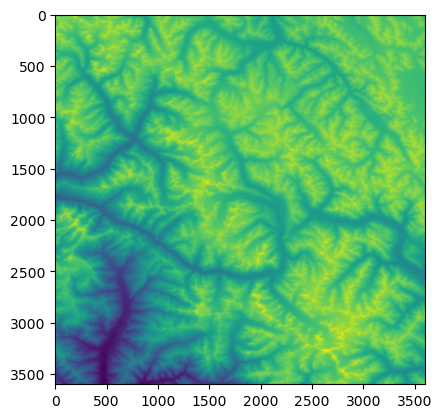

In [57]:
plt.imshow(im_data)

In [58]:
im_data.shape

(3601, 3601)

In [59]:
im = gdal.Open(file)

In [60]:
geotransform = im.GetGeoTransform()

In [61]:
projection = im.GetProjection()


In [62]:
# Extract corner coordinates
ulx, xres, xskew, uly, yskew, yres = geotransform
lrx = ulx + (im.RasterXSize * xres)
lry = uly + (im.RasterYSize * yres)

# Create coordinate transformation
source_projection = osr.SpatialReference()
source_projection.ImportFromWkt(projection)
target_projection = osr.SpatialReference()
target_projection.ImportFromEPSG(4326)  # Assuming you want WGS84 coordinates

transform = osr.CoordinateTransformation(source_projection, target_projection)

# Transform corner coordinates to target CRS
ul_lon, ul_lat, _ = transform.TransformPoint(ulx, uly)
lr_lon, lr_lat, _ = transform.TransformPoint(lrx, lry)

# Print the extracted coordinates
print("Upper Left: ", ul_lon, ul_lat)
print("Lower Right: ", lr_lon, lr_lat)
print("Upper Right: ", ul_lat, lr_lon)
print("Lower Left: ", lr_lat, ul_lon)

Upper Left:  76.99986111111112 33.00013888888889
Lower Right:  78.0001388888889 31.999861111111112
Upper Right:  33.00013888888889 78.0001388888889
Lower Left:  31.999861111111112 76.99986111111112


In [63]:
data = pd.read_csv("/home/smitesh22/Data/extent.csv")

In [64]:
import re
pattern = r"\/([^\/]+)\.tif$"

match = re.search(pattern, file)

filename = match.group(1)
print(filename)



N32E077_wgs84


In [65]:
new_data = {
    "filename": filename,
    "upper_lat": ul_lat,
    "upper_long": lr_lon,
    "lower_lat": lr_lat,
    "lower_long": ul_lon
}

In [66]:
new_row_df = pd.DataFrame([new_data])

# Concatenate the existing data with the new row DataFrame
data = pd.concat([data, new_row_df], ignore_index=True)

# Write the updated DataFrame back to CSV
data.to_csv("/home/smitesh22/Data/extent.csv", index=False)

In [67]:
data

,filename,upper_lat,upper_long,lower_lat,lower_long
0,N15E073_wgs84,16.000139,72.999861,14.999861,74.000139
1,N15E073_wgs84,16.000139,72.999861,14.999861,74.000139
2,N15E073_wgs84,16.000139,74.000139,14.999861,72.999861
3,N23E069_wgs84,24.000139,70.000139,22.999861,68.999861
4,N27E071_wgs84,28.000139,72.000139,26.999861,70.999861
5,N14E077_wgs84,15.000139,78.000139,13.999861,76.999861
6,N09E078_wgs84,10.000139,79.000139,8.999861,77.999861
7,N23E071_wgs84,24.000139,72.000139,22.999861,70.999861
8,N24E081_wgs84,25.000139,82.000139,23.999861,80.999861
9,N25E071_wgs84,26.000139,72.000139,24.999861,70.999861


In [68]:
from osgeo_utils import gdal_fillnodata

In [69]:
from adal import AdalError